In [84]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [418]:
'''
1 - good
2 - normal
3 - bad

'''


excel_data = pd.read_excel('TGT_wells.xlsx',  sheet_name='Лист1')
excel_data

,№,Well,Type of well,Type of fluid,OD,ID,Tool,Chorus QC (LFP/HFP),"Max flow rates, BPD",LFP,HFP
0,1,2/8-F -18,Single String Water Injector,Water,4.500,3.50000,9a,normal/bad,4900.00,2,3
1,2,2/8-F -18,Single String Water Injector,Water,4.500,3.50000,9a,normal/bad,9573.00,2,3
2,3,PB-404,Water Injector,Water,3.500,2.86700,10a,normal/good,6000.00,2,1
3,4,PB-404,Water Injector,Water,5.500,4.14300,10a,good/good,6000.00,1,1
4,5,LACH-904,Water Injector,Water,3.500,2.99200,10a,normal/good,5760.00,2,1
5,6,LLL-1749,Water Injector,Water,2.875,2.44100,10a,good/good,1441.00,1,1
6,7,LLL-1749,Water Injector,Water,2.875,2.44100,10a,normal/good,3600.00,2,1
7,8,LLL-1749,Water Injector,Water,5.500,4.89201,10a,good/good,1441.00,1,1
8,9,LLL-1749,Water Injector,Water,5.500,4.89201,10a,good/good,3600.00,1,1
9,10,LCav-947,Water Injector,Water,2.875,2.44100,10a,normal/good,4320.00,2,1


In [333]:
y_10a = excel_data.query("Tool == '10a'")['OD']
x_10a = excel_data.query("Tool == '10a'")['Max flow rates, BPD']
c_10a = np.array(excel_data.query("Tool == '10a'")['LFP'])

y_9a = excel_data.query("Tool == '9a'")['OD']
x_9a = excel_data.query("Tool == '9a'")['Max flow rates, BPD']
c_9a = np.array(excel_data.query("Tool == '9a'")['LFP'])

d = {1:'g', 2:'y', 3:'r'}

plt.title('LFP')
plt.scatter(x_10a, y_10a, c = [d[i] for i in c_10a], marker = 'v')
plt.scatter(x_9a, y_9a, c = [d[i] for i in c_9a], marker = 's')
plt.xlabel('Q, BPD')
plt.ylabel('OD, in')

plt.grid()

<IPython.core.display.Javascript object>


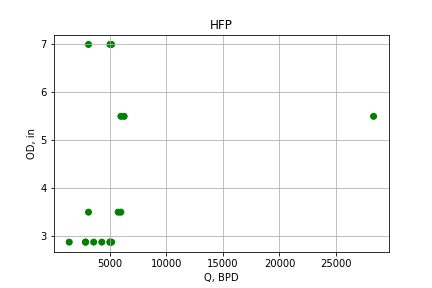

In [287]:
y = excel_data.query("Tool == '10a'")['OD']
x = excel_data.query("Tool == '10a'")['Max flow rates, BPD']
c = np.array(excel_data.query("Tool == '10a'")['HFP'])
d = {1:'g', 2:'y', 3:'r'}

plt.title('HFP')
plt.scatter(x, y, c = [d[i] for i in c])
plt.xlabel('Q, BPD')
plt.ylabel('OD, in')

plt.grid()

In [91]:
excel_data.query("Tool == '9a'")['OD']

0    4.5
1    4.5
Name: OD, dtype: float64

In [462]:
'''
Нахождение скорости в м/мин. Принимает расход в бар/сут и диаметр в in
Внешний диаметр SNL 9 - 42 мм
'''

def velocity(Q, ID):
    ID = 0.0254*ID # Перевод в метры
    Q = 0.158987*Q    # Перевод в м^3/сут
    
    return Q/(3.14*((ID/2)**2-(0.042/2)**2))/(24*60)

velocity(4320, 2.44) ### м/мин

292.5307854293046

<IPython.core.display.Javascript object>


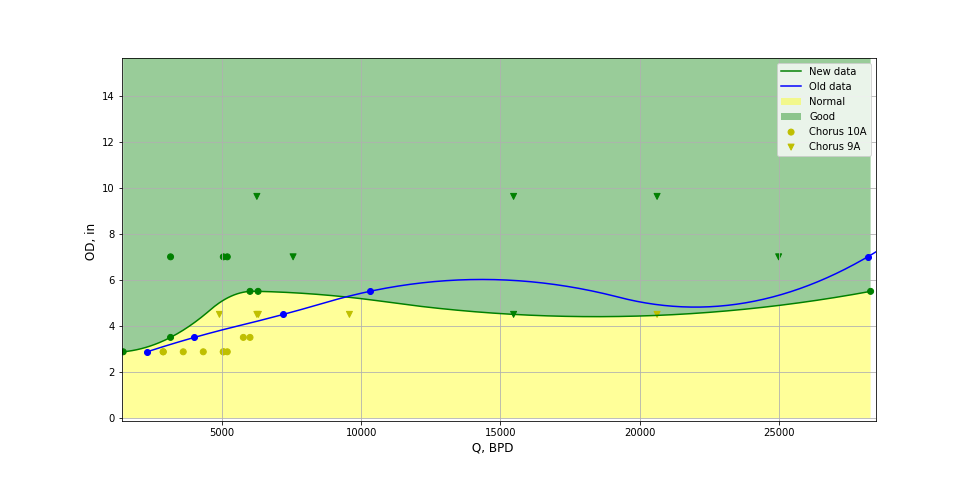

In [175]:
from scipy.interpolate import interp1d
%matplotlib notebook

x = [1441, 3144.00, 15473.00, 6000, 6290, 28305]
x_new = np.linspace(min(x), max(x),500)
y = [2.875, 3.5,  4.5, 5.5, 5.5, 5.5]
f = interp1d(x, y, kind='quadratic')
y_smooth=f(x_new)

###
y_do = [2.875, 3.5, 4.5, 5.5, 7, 9.625, 13.375]
x_do = [2300, 4000, 7200, 10300, 28200, 31400, 56500]

x_new_do = np.linspace(min(x_do), max(x_do),500)
f = interp1d(x_do, y_do, kind='quadratic')
y_smooth_do=f(x_new_do)
###

fig, ax = plt.subplots() 
#ax.plot(x, y, 'b')
ax.plot(x_new, y_smooth, 'g')
ax.plot(x_new_do, y_smooth_do, color='b')
ax.fill_between(x_new, y_smooth, 0, facecolor='yellow', alpha = 0.4)
ax.fill_between(x_new, y_smooth, max(y_smooth_do), facecolor='green', alpha = 0.4)
###
y_10a = excel_data.query("Tool == '10a'")['OD']
x_10a = excel_data.query("Tool == '10a'")['Max flow rates, BPD']
c_10a = np.array(excel_data.query("Tool == '10a'")['LFP'])

y_9a = excel_data.query("Tool == '9a'")['OD']
x_9a = excel_data.query("Tool == '9a'")['Max flow rates, BPD']
c_9a = np.array(excel_data.query("Tool == '9a'")['LFP'])

d = {1:'g', 2:'y', 3:'r'}

ax.scatter(x_10a, y_10a, c = [d[i] for i in c_10a], marker = 'o')
ax.scatter(x_9a, y_9a, c = [d[i] for i in c_9a], marker = 'v')
ax.scatter(x_do, y_do, color='b')
###


plt.grid()
ax.set_xlabel(' Q, BPD    ',
              fontsize = 12,    #  размер шрифта
              color = 'black')     #  ширина крайней линии


ax.set_ylabel(' OD, in  ',
              fontsize = 12,
              color = 'black')
ax.legend(['New data', 'Old data', 'Normal', 'Good', 'Chorus 10A', 'Chorus 9A'], loc = 'upper right')


plt.show() 


<IPython.core.display.Javascript object>


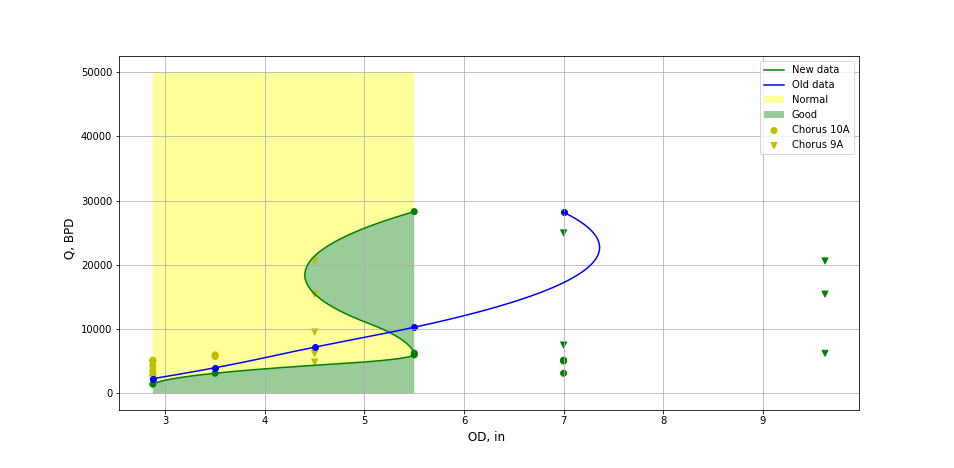

In [288]:
from scipy.interpolate import interp1d
%matplotlib notebook

x = [1441, 3144.00, 15473.00, 6000, 6290, 28305]
x_new = np.linspace(min(x), max(x),500)
y = [2.875, 3.5,  4.5, 5.5, 5.5, 5.5]
f = interp1d(x, y, kind='quadratic')
y_smooth=f(x_new)

###
y_do = [2.875, 3.5, 4.5, 5.5, 7, 9.625, 13.375][0:5]
x_do = [2300, 4000, 7200, 10300, 28200, 31400, 56500][0:5]

x_new_do = np.linspace(min(x_do), max(x_do),500)
f = interp1d(x_do, y_do, kind='quadratic')
y_smooth_do=f(x_new_do)
###

fig, ax = plt.subplots() 

ax.plot(y_smooth, x_new, 'g')
ax.plot(y_smooth_do, x_new_do, color='b')
ax.fill_between(y_smooth, x_new, 50000, facecolor='yellow', alpha = 0.4)
ax.fill_between(y_smooth, x_new, 0, facecolor='green', alpha = 0.4)
###
y_10a = excel_data.query("Tool == '10a'")['OD']
x_10a = excel_data.query("Tool == '10a'")['Max flow rates, BPD']
c_10a = np.array(excel_data.query("Tool == '10a'")['LFP'])

y_9a = excel_data.query("Tool == '9a'")['OD']
x_9a = excel_data.query("Tool == '9a'")['Max flow rates, BPD']
c_9a = np.array(excel_data.query("Tool == '9a'")['LFP'])

d = {1:'g', 2:'y', 3:'r'}

ax.scatter(y_10a, x_10a, c = [d[i] for i in c_10a], marker = 'o')
ax.scatter(y_9a, x_9a, c = [d[i] for i in c_9a], marker = 'v')
ax.scatter(y_do, x_do, color='b')
###


plt.grid()
ax.set_ylabel(' Q, BPD    ',
              fontsize = 12,    #  размер шрифта
              color = 'black')     #  ширина крайней линии


ax.set_xlabel(' OD, in  ',
              fontsize = 12,
              color = 'black')
ax.legend(['New data', 'Old data', 'Normal', 'Good', 'Chorus 10A', 'Chorus 9A'], loc = 'upper right')


plt.show() 


In [205]:
### Green background

ax.fill_between([5.5, 10], [max(x_new), max(x_new)], facecolor='green', alpha = 0.4)

## Chorus 9A

<IPython.core.display.Javascript object>


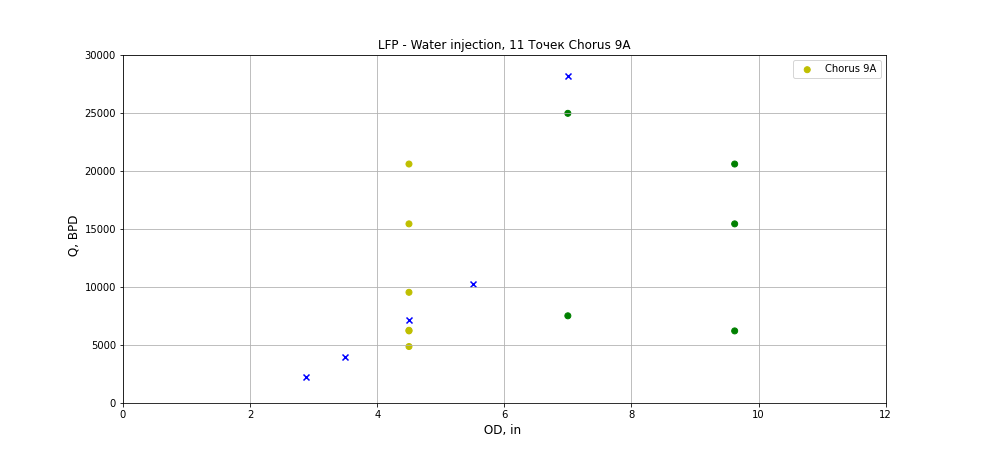

In [311]:
from scipy.interpolate import interp1d
%matplotlib notebook

fig, ax = plt.subplots() 

###
y_9a = excel_data.query("Tool == '9a'")['OD']
x_9a = excel_data.query("Tool == '9a'")['Max flow rates, BPD']
c_9a = np.array(excel_data.query("Tool == '9a'")['LFP'])

d = {1:'g', 2:'y', 3:'r'}

ax.scatter(y_9a, x_9a, c = [d[i] for i in c_9a], marker = 'o')
###

###
y_do = [2.875, 3.5, 4.5, 5.5, 7, 9.625, 13.375][0:5]
x_do = [2300, 4000, 7200, 10300, 28200, 31400, 56500][0:5]

ax.scatter(y_do, x_do, color='b', marker = 'x')
###
ax.set_title(f'LFP - Water injection, {len(x_9a)}, Точек Chorus 9A')

plt.grid()
ax.set_ylabel(' Q, BPD    ',
              fontsize = 12,    #  размер шрифта
              color = 'black')     #  ширина крайней линии


ax.set_xlabel(' OD, in  ',
              fontsize = 12,
              color = 'black')
ax.legend(['Chorus 9A'], loc = 'upper right')
ax.set_xlim(0,12)
ax.set_ylim(0, 30000)

plt.show() 


## Chorus 10A

<IPython.core.display.Javascript object>


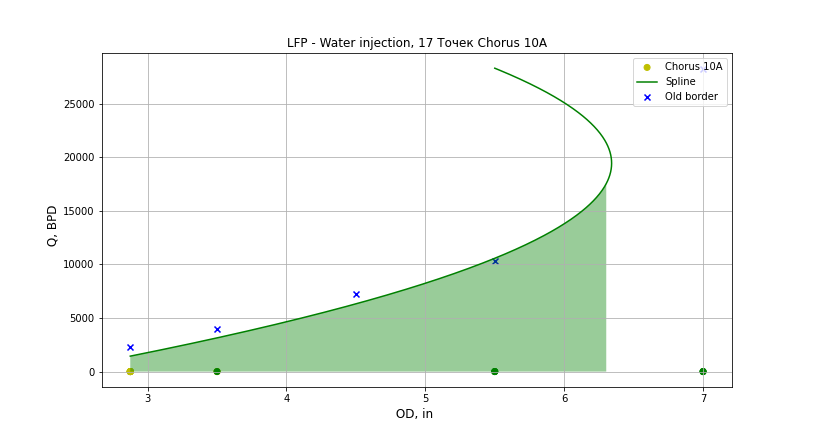

In [344]:
fig, ax = plt.subplots() 

###
y_10a = excel_data.query("Tool == '10a'")['OD']
x_10a = excel_data.query("Tool == '10a'")['Max flow rates, BPD']
c_10a = np.array(excel_data.query("Tool == '10a'")['LFP'])

d = {1:'g', 2:'y', 3:'r'}

x_line = [1441, 3144, 28305]
y_line = [2.875, 3.5, 5.5]
x_line_new = np.linspace(min(x_line), max(x_line),500)
f = interp1d(x_line, y_line, kind='quadratic')
y_line_new=f(x_line_new)

ax.scatter(y_10a, x_10, c = [d[i] for i in c_10a], marker = 'o')
ax.plot(y_line_new, x_line_new, 'g')
#ax.fill_between(y_line_new, x_line_new, 0, facecolor='green', alpha = 0.3)
#ax.fill_between(y_line_new, x_line_new, max(x_line_new), facecolor='yellow', alpha = 0.3)
#ax.fill_between([max(y_line_new), 10], [max(x_line_new), max(x_line_new)], 0, facecolor='green', alpha = 0.3)

###
y_do = [2.875, 3.5, 4.5, 5.5, 7, 9.625, 13.375][0:5]
x_do = [2300, 4000, 7200, 10300, 28200, 31400, 56500][0:5]

ax.scatter(y_do, x_do, color='b', marker = 'x')
###

plt.grid()
ax.set_ylabel(' Q, BPD    ',
              fontsize = 12,    #  размер шрифта
              color = 'black')     #  ширина крайней линии


ax.set_xlabel(' OD, in  ',
              fontsize = 12,
              color = 'black')
ax.set_title(f'LFP - Water injection, {len(x_10a)} Точек Chorus 10A')

ax.legend(['Chorus 10A', 'Spline', 'Old border'], loc = 'upper right')
ax.set_xlim(0,12)
ax.set_ylim(0, 30000)
ax.fill_between(y_line_new[:300], x_line_new[:300], 0, facecolor='green', alpha = 0.4)

plt.show()


<IPython.core.display.Javascript object>


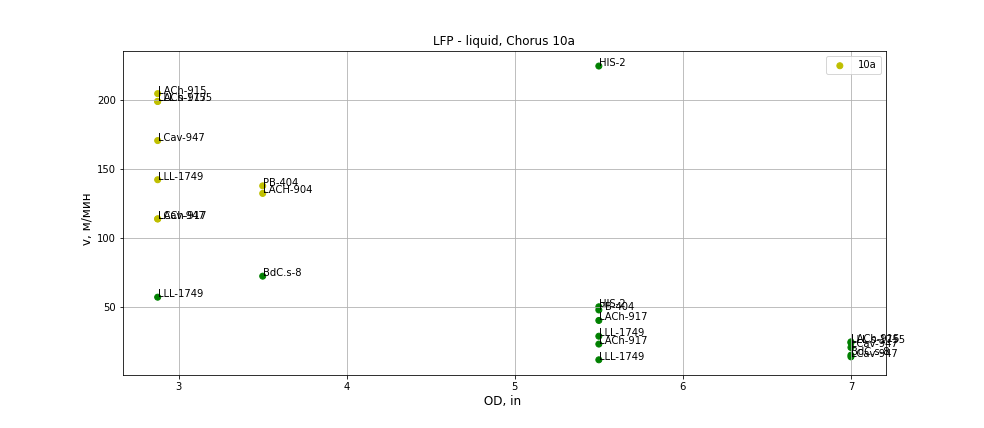

In [536]:
fig, ax = plt.subplots() 

chor = '10a'

###
y = excel_data.query(f"Tool == '{chor}'")['OD']
x = excel_data.query(f"Tool == '{chor}'")['Max flow rates, BPD']
name =  excel_data.query(f"Tool == '{chor}'")['Well']
c = np.array(excel_data.query(f"Tool == '{chor}'")['LFP'])
test_v = [velocity_ring(Q, OD) for Q, OD in zip(x, y)]
###

d = {1:'g', 2:'y', 3:'r'}

ax.scatter(y, test_v, c=[d[i] for i in c], marker='o')
ax.legend([chor])

plt.grid()
ax.set_ylabel(' v, м/мин    ',
              fontsize = 12,    #  размер шрифта
              color = 'black')     #  ширина крайней линии

ax.set_xlabel(' OD, in  ',
              fontsize = 12,
              color = 'black')
ax.set_title(f'L
FP - liquid, Chorus {chor}')


for i in range(len(x)):
    ax.annotate(f'{np.array(name)[i]}', xy=(np.array(y)[i], np.array(test_v)[i]), fontsize=10)


## Gas wells

In [398]:
'''
1 - good
2 - normal
3 - bad

'''


excel_gas = pd.read_excel('TGT_gas.xlsx',  sheet_name='Лист1')
excel_gas

,Unnamed: 0,№,Well,Type of well,Type of fluid,"Pressure, psi",OD,ID,Tool,Chorus QC (LFP/HFP),"Max flow rates, BPD",LFP,HFP
0,NaN,38,E-42,Gas producer,Gas,1656.00,3.5,NaN,9a,good/good,9000,1,1
1,NaN,39,E-11,Gas producer,Gas,592.00,7.0,6.27600,9a,normal/bad,98156,2,3
2,NaN,40,E-11,Gas producer,Gas,566.00,7.0,6.27600,9a,normal/bad,71652,2,3
3,NaN,41,34G,Gas Injector,Gas,1274.14,4.5,3.90551,9a,good/good,4958,1,1
4,NaN,42,32,Газонагнетательная,Gas,1437.00,4.5,3.90551,9a,good/good,5400,1,1
5,NaN,43,BRNW-51H1,Gas producer,Gas,1623.00,4.5,3.74000,10a,good/good,6101,1,1
6,NaN,44,B-03,Gas producer,Gas,243.00,7.0,6.18402,9a,good/good,1531,1,1


<IPython.core.display.Javascript object>


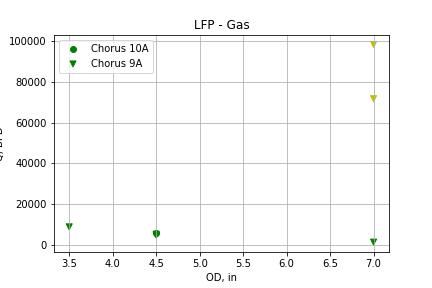

In [423]:
y_10a = excel_gas.query("Tool == '10a'")['OD']
x_10a = excel_gas.query("Tool == '10a'")['Max flow rates, BPD']
c_10a = np.array(excel_gas.query("Tool == '10a'")['LFP'])

y_9a = excel_gas.query("Tool == '9a'")['OD']
x_9a = excel_gas.query("Tool == '9a'")['Max flow rates, BPD']
c_9a = np.array(excel_gas.query("Tool == '9a'")['LFP'])

d = {1:'g', 2:'y', 3:'r'}

plt.title('LFP - Gas')
plt.scatter(y_10a, x_10a, c = [d[i] for i in c_10a], marker = 'o')
plt.scatter(y_9a, x_9a, c = [d[i] for i in c_9a], marker = 'v')
plt.legend(['Chorus 10A', 'Chorus 9A'])
plt.ylabel('Q, BPD')
plt.xlabel('OD, in')



plt.grid()

In [496]:
Q_old = [2300, 4000, 7200, 10300, 28200, 31400, 56500] # Bpd
ID_old = [2.441, 2.992, 3.958, 4.778, 6.366, 8.835, 12.347] ## in

In [507]:
v_old = [velocity(Q, ID) for Q, ID in zip(Q_old, ID_old)]
v_old_ring = [velocity_ring(Q, ID) for Q, ID in zip(Q_old, ID_old)]

<IPython.core.display.Javascript object>


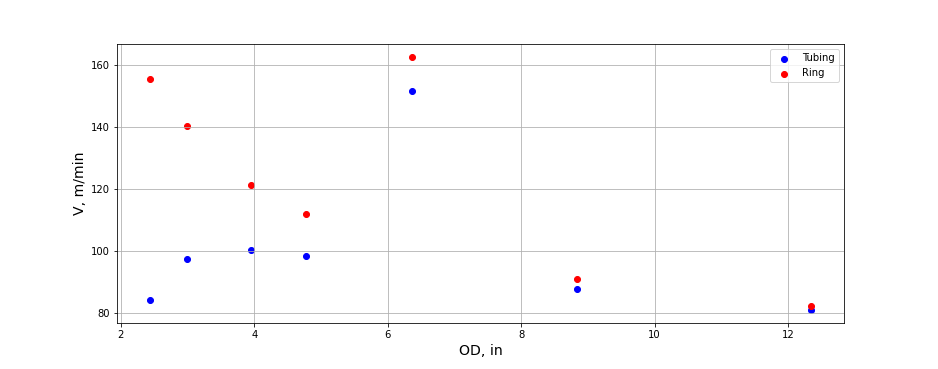

In [518]:
plt.scatter(np.array(ID_old), v_old, color = 'b')
plt.scatter(np.array(ID_old), v_old_ring, color = 'r')
plt.xlabel('OD, in', fontsize=14)
plt.ylabel('V, m/min', fontsize=14)
plt.legend(['Tubing', 'Ring'])

plt.grid()

array([0.0620014, 0.0759968, 0.1005332, 0.1213612, 0.1616964, 0.224409 ,
       0.3136138])

In [505]:
'''
Нахождение скорости в м/мин. Принимает расход в бар/сут и диаметр в in
Внешний диаметр SNL 9 - 42 мм
'''

def velocity(Q, ID):
    ID = 0.0254*ID # Перевод в метры
    Q = 0.158987*Q    # Перевод в м^3/сут
    
    return Q/(3.14*(ID/2)**2)/(24*60)

velocity(4320, 2.44) ### м/мин

158.18530148692503

In [531]:
def velocity_ring(Q, ID):
    ID = 0.0254*ID # Перевод в метры
    Q = 0.158987*Q    # Перевод в м^3/сут
    
    return Q/(3.14*((ID/2)**2-(0.042/2)**2))/(24*60)

velocity_ring(6280, 3.95) ### м/мин

106.38996931383434